<a href="https://colab.research.google.com/github/String-ru/AIFFEL_quest_cr/blob/main/Tensorflow/0204_Chapter5_holdout_no_test_data_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
train_images_with_noise_channels = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_noise_channels = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)

from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.8648 - loss: 0.4712 - val_accuracy: 0.9572 - val_loss: 0.1500
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9630 - loss: 0.1320 - val_accuracy: 0.9684 - val_loss: 0.1076
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9758 - loss: 0.0822 - val_accuracy: 0.9722 - val_loss: 0.0960
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9831 - loss: 0.0590 - val_accuracy: 0.9734 - val_loss: 0.0870
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9880 - loss: 0.0424 - val_accuracy: 0.9796 - val_loss: 0.0738
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9907 - loss: 0.0335 - val_accuracy: 0.9768 - val_loss: 0.0788
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9927 - loss: 0.0254 - val_accuracy: 0.9779 - val_loss: 0.0812
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9949 - loss: 0.0189 - va

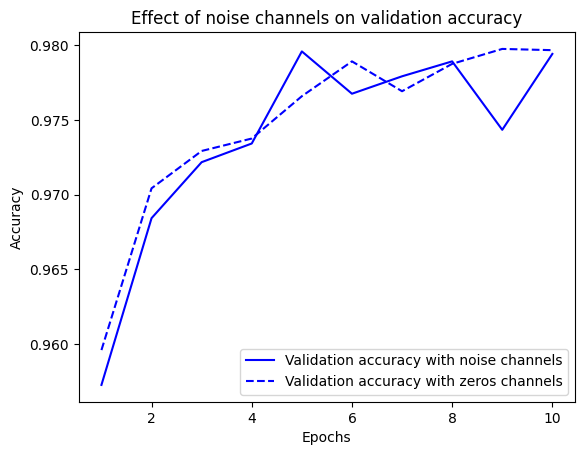

In [ ]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, 'b-', label='Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'b--', label='Validation accuracy with zeros channels')
plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
    epochs=100,
    batch_size=128,
    validation_split=0.2)

history_random = model.fit(train_images, random_train_labels,
    epochs=100,
    batch_size=128,
    validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.0983 - loss: 2.3344 - val_accuracy: 0.1058 - val_loss: 2.3051
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1191 - loss: 2.2969 - val_accuracy: 0.1015 - val_loss: 2.3087
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.1302 - loss: 2.2887 - val_accuracy: 0.1000 - val_loss: 2.3177
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.1428 - loss: 2.2747 - val_accuracy: 0.1088 - val_loss: 2.3291
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1549 - loss: 2.2592 - val_accuracy: 0.1001 - val_loss: 2.3345
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1660 - loss: 2.2377 - val_accuracy: 0.1023 - val_loss: 2.3493
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.1873 - loss: 2.2137 - val_accuracy: 0.0993 - val_loss: 2.3655
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.2026 - loss: 2.1835 -

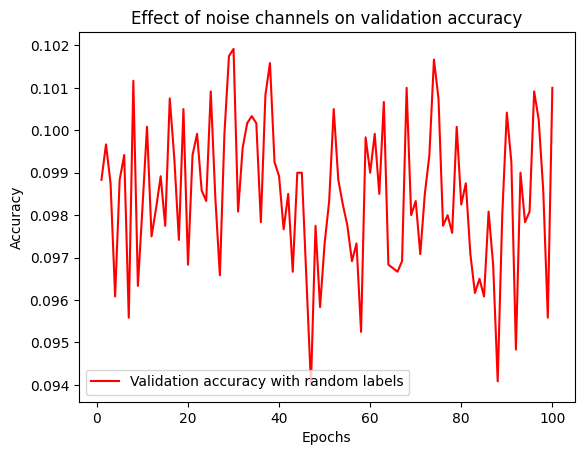

In [ ]:
import matplotlib.pyplot as plt

val_acc_random = history_random.history['val_accuracy']

epochs = range(1, 101)
plt.plot(epochs, val_acc_random, 'r-', label='Validation accuracy with random labels')

plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np

# MNIST 데이터셋 로드 및 전처리
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# 데이터를 합쳐서 섞은 후, 검증 데이터와 훈련 데이터로 분리합니다.
data = np.concatenate([train_images, test_images])
labels = np.concatenate([train_labels, test_labels])

num_validation_samples = 10000
# 데이터와 레이블을 함께 섞어줌으로서 정확도 높이기
# 0.1 조금 넘는 처참한 정확도
# Validation Score: [2.415742874145508, 0.10649999976158142]
# Test Score: [2.4199111461639404, 0.10769999772310257]
# 원래는 np.random.shuffle(data)
# 원래는 데이터만 섞었음
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# 검증 데이터와 훈련 데이터를 분리합니다.
validation_data = data[:num_validation_samples]
validation_labels = labels[:num_validation_samples]
training_data = data[num_validation_samples:]
training_labels = labels[num_validation_samples:]

# 모델 정의
def get_model():
  model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model

# 모델 훈련 및 검증
model = get_model()
model.fit(training_data, training_labels, epochs=10, batch_size=128) # 훈련 데이터로 모델 훈련
validation_score = model.evaluate(validation_data, validation_labels) # 검증 데이터로 모델 평가

# 전체 데이터로 모델 재훈련 및 테스트
model = get_model()

final_training_data = np.concatenate([training_data, validation_data])
final_training_labels = np.concatenate([training_labels, validation_labels])
model.fit(final_training_data, final_training_labels, epochs=10, batch_size=128)
#테스트 데이터 포함하지 않도록 코드 수정!

test_score = model.evaluate(test_images, test_labels) # 테스트 데이터로 모델 평가

print("Validation Score:", validation_score)
print("Test Score:", test_score)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8718 - loss: 0.4368
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9673 - loss: 0.1122
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9791 - loss: 0.0719
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9848 - loss: 0.0508
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9892 - loss: 0.0355
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9921 - loss: 0.0255
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9941 - loss: 0.0208
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9962 - loss: 0.0142
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9969 - loss: 0.0116
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9980 - loss: 0.0094
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9825 - loss: 0.0731
Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np

# MNIST 데이터셋 로드 및 전처리
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# 데이터를 합쳐서 섞은 후, 검증 데이터와 훈련 데이터로 분리합니다.
data = np.concatenate([train_images, test_images])
labels = np.concatenate([train_labels, test_labels])

# K-폴드 검증 설정
k = 3
num_validation_samples = len(data) // k

# K-폴드 검증 수행
validation_scores = []
for fold in range(k):
  # 검증 데이터와 훈련 데이터 분할
  validation_data = data[num_validation_samples * fold: num_validation_samples * (fold + 1)]
  validation_labels = labels[num_validation_samples * fold: num_validation_samples * (fold + 1)]
  training_data = np.concatenate([data[:num_validation_samples * fold], data[num_validation_samples * (fold + 1):]])
  training_labels = np.concatenate([labels[:num_validation_samples * fold], labels[num_validation_samples * (fold + 1):]])

  # 모델 생성 및 훈련
  model = get_model()  # get_model() 함수는 이전 답변에서 정의된 함수를 사용합니다.
  model.fit(training_data, training_labels, epochs=10, batch_size=128)

  # 검증 데이터로 평가
  validation_score = model.evaluate(validation_data, validation_labels, verbose=0)
  validation_scores.append(validation_score[1])  # 정확도만 저장

# 평균 검증 점수 계산
validation_score = np.average(validation_scores)

# 전체 데이터로 모델 재훈련 및 테스트
model = get_model()
model.fit(data, labels, epochs=10, batch_size=128)
test_score = model.evaluate(test_images, test_labels, verbose=0)

print("Average Validation Accuracy:", validation_score)
print("Test Accuracy:", test_score[1])  # 테스트 정확도 출력

Epoch 1/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8611 - loss: 0.4764
Epoch 2/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9613 - loss: 0.1317
Epoch 3/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9765 - loss: 0.0843
Epoch 4/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9839 - loss: 0.0569
Epoch 5/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9877 - loss: 0.0400
Epoch 6/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9909 - loss: 0.0312
Epoch 7/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9940 - loss: 0.0225
Epoch 8/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9960 - loss: 0.0165
Epoch 9/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9971 - loss: 0.0127
Epoch 10/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9984 - loss: 0.0083
Epoch 1/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8628 - loss: 0.4700
Epoch 2/10
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s

In [6]:
# Chapter 5.3~ 시작!!

from tensorflow.keras.datasets import mnist # Import mnist
import tensorflow.keras as keras  # Import keras
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.4447 - loss: 3323.6265 - val_accuracy: 0.2001 - val_loss: 2.2327
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2011 - loss: 2.8646 - val_accuracy: 0.2234 - val_loss: 2.2759
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1858 - loss: 2.7168 - val_accuracy: 0.1776 - val_loss: 2.3780
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.1845 - loss: 2.5072 - val_accuracy: 0.2288 - val_loss: 2.1234
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.1936 - loss: 2.4944 - val_accuracy: 0.2194 - val_loss: 2.5290
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.1865 - loss: 2.4891 - val_accuracy: 0.2078 - val_loss: 2.1360
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1940 - loss: 2.3748 - val_accuracy: 0.1922 - val_loss: 2.1943
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1865 - loss: 2.8518 - val_a

In [7]:
model = keras.Sequential([
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8404 - loss: 0.7739 - val_accuracy: 0.9611 - val_loss: 0.1404
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9621 - loss: 0.1307 - val_accuracy: 0.9636 - val_loss: 0.1532
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9739 - loss: 0.0976 - val_accuracy: 0.9663 - val_loss: 0.1484
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9805 - loss: 0.0695 - val_accuracy: 0.9679 - val_loss: 0.1579
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9843 - loss: 0.0609 - val_accuracy: 0.9664 - val_loss: 0.2167
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9860 - loss: 0.0585 - val_accuracy: 0.9691 - val_loss: 0.1879
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9873 - loss: 0.0537 - val_accuracy: 0.9746 - val_loss: 0.1780
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9897 - loss: 0.0469 - val_acc

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7141 - loss: 1.0723 - val_accuracy: 0.9010 - val_loss: 0.3624
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8988 - loss: 0.3716 - val_accuracy: 0.9154 - val_loss: 0.3086
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9091 - loss: 0.3246 - val_accuracy: 0.9170 - val_loss: 0.2928
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9145 - loss: 0.3031 - val_accuracy: 0.9204 - val_loss: 0.2834
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9186 - loss: 0.2917 - val_accuracy: 0.9220 - val_loss: 0.2778
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9187 - loss: 0.2818 - val_accuracy: 0.9242 - val_loss: 0.2737
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9208 - loss: 0.2801 - val_accuracy: 0.9246 - val_loss: 0.2736
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9228 - loss: 0.2801 - val_accuracy: 0.

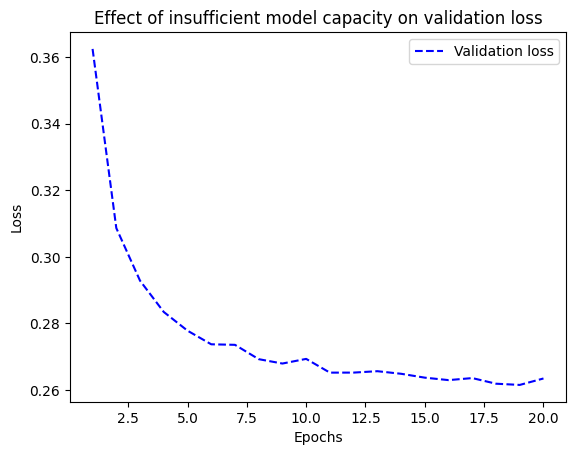

In [11]:
model = keras.Sequential([keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(train_images, train_labels,
          epochs=20,
          batch_size=128,
          validation_split=0.2)

import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [13]:
model = keras.Sequential([
    keras.layers.Dense(96, activation="relu"),
    keras.layers.Dense(96, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8309 - loss: 0.6207 - val_accuracy: 0.9458 - val_loss: 0.1872
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9470 - loss: 0.1797 - val_accuracy: 0.9607 - val_loss: 0.1374
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9619 - loss: 0.1253 - val_accuracy: 0.9678 - val_loss: 0.1124
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9727 - loss: 0.0875 - val_accuracy: 0.9714 - val_loss: 0.0974
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9795 - loss: 0.0689 - val_accuracy: 0.9712 - val_loss: 0.0950
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9816 - loss: 0.0600 - val_accuracy: 0.9698 - val_loss: 0.1030
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9862 - loss: 0.0485 - val_accuracy: 0.9728 - val_loss: 0.0966
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9870 - loss: 0.0395 - val_accuracy: 0.

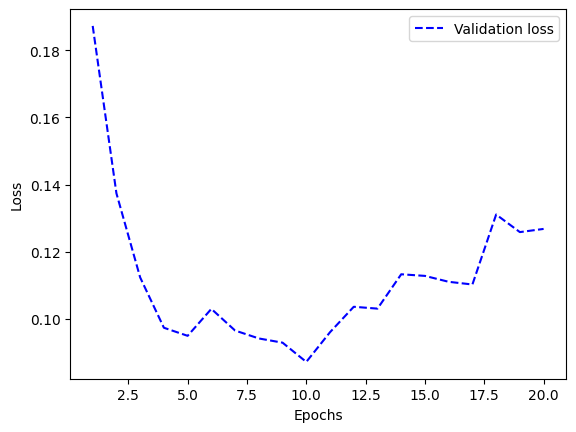

In [16]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [17]:
# Chapter 5.4

In [25]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1.
 return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
 keras.layers.Dense(16, activation="relu"),
 keras.layers.Dense(16, activation="relu"),
 keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
 epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.6766 - loss: 0.5998 - val_accuracy: 0.8638 - val_loss: 0.3794
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8927 - loss: 0.3237 - val_accuracy: 0.8813 - val_loss: 0.3060
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9247 - loss: 0.2343 - val_accuracy: 0.8894 - val_loss: 0.2801
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9401 - loss: 0.1842 - val_accuracy: 0.8907 - val_loss: 0.2737
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9493 - loss: 0.1556 - val_accuracy: 0.8789 - val_loss: 0.3019
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9614 - loss: 0.1254 - val_accuracy: 0.8891 - val_loss: 0.2881
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9703 - loss: 0.1091 - val_accuracy: 0.8705 - val_loss: 0.3516
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9720 - loss: 0.0958 - val_accuracy: 0.8769 - v

In [26]:
model = keras.Sequential([
 keras.layers.Dense(4, activation="relu"),
 keras.layers.Dense(4, activation="relu"),
 keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
history_smaller_model = model.fit(
 train_data, train_labels,
 epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.5717 - loss: 0.6548 - val_accuracy: 0.6981 - val_loss: 0.5741
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.7456 - loss: 0.5422 - val_accuracy: 0.8094 - val_loss: 0.5271
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8335 - loss: 0.4923 - val_accuracy: 0.8009 - val_loss: 0.5049
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8714 - loss: 0.4579 - val_accuracy: 0.8616 - val_loss: 0.4783
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9017 - loss: 0.4252 - val_accuracy: 0.8649 - val_loss: 0.4596
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9238 - loss: 0.3908 - val_accuracy: 0.8805 - val_loss: 0.4310
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9407 - loss: 0.3475 - val_accuracy: 0.8690 - val_loss: 0.4033
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9487 - loss: 0.2986 - val_accuracy: 0.8781 - v

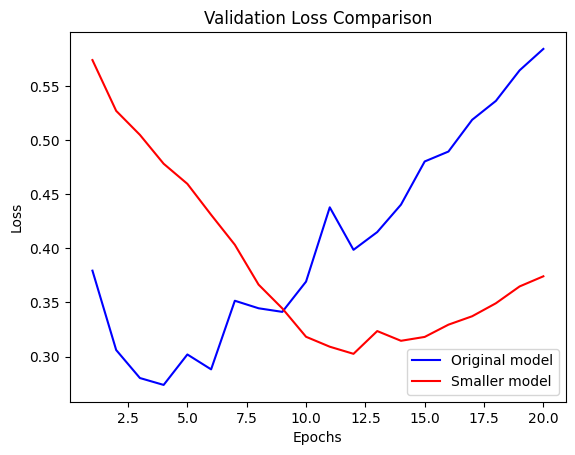

In [27]:
import matplotlib.pyplot as plt

# 원본 모델과 축소된 모델의 검증 손실 가져오기
original_val_loss = history_original.history['val_loss']
smaller_model_val_loss = history_smaller_model.history['val_loss']

# Epochs 설정
epochs = range(1, len(original_val_loss) + 1)

# 그래프 그리기
plt.plot(epochs, original_val_loss, 'b', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'r', label='Smaller model')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
model = keras.Sequential([
 keras.layers.Dense(512, activation="relu"),
 keras.layers.Dense(512, activation="relu"),
 keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
history_larger_model = model.fit(
 train_data, train_labels,
 epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 347ms/step - accuracy: 0.6218 - loss: 0.6434 - val_accuracy: 0.8702 - val_loss: 0.3426
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 380ms/step - accuracy: 0.8636 - loss: 0.3300 - val_accuracy: 0.8797 - val_loss: 0.2893
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 371ms/step - accuracy: 0.9021 - loss: 0.2466 - val_accuracy: 0.8790 - val_loss: 0.2933
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 385ms/step - accuracy: 0.9302 - loss: 0.1758 - val_accuracy: 0.8901 - val_loss: 0.2844
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 387ms/step - accuracy: 0.9434 - loss: 0.1483 - val_accuracy: 0.8855 - val_loss: 0.2985
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 325ms/step - accuracy: 0.9655 - loss: 0.0956 - val_accuracy: 0.8858 - val_loss: 0.3207
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 356ms/step - accuracy: 0.9818 - loss: 0.0616 - val_accuracy: 0.8854 - val_loss: 0.3408
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 381ms/step - accuracy: 0.9878 - loss: 0.0441 - val_accu

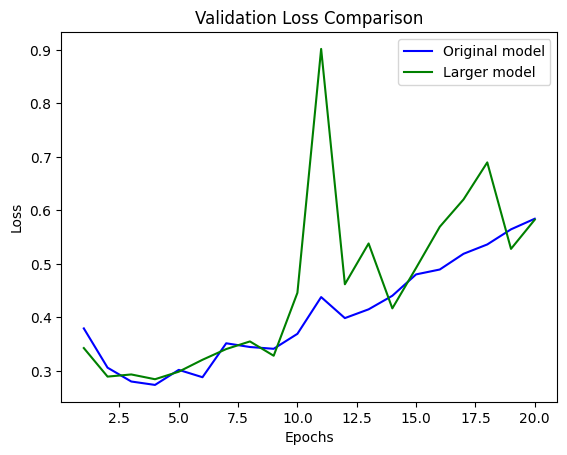

In [30]:
import matplotlib.pyplot as plt

# 원본 모델과 크기를 키운 모델의 검증 손실 가져오기
original_val_loss = history_original.history['val_loss']
larger_model_val_loss = history_larger_model.history['val_loss']

# Epochs 설정
epochs = range(1, len(original_val_loss) + 1)

# 그래프 그리기
plt.plot(epochs, original_val_loss, 'b', label='Original model')
plt.plot(epochs, larger_model_val_loss, 'g', label='Larger model')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
from tensorflow.keras import regularizers
model = keras.Sequential([
 keras.layers.Dense(16,
 kernel_regularizer=regularizers.l2(0.002),
 activation="relu"),
 keras.layers.Dense(16,
 kernel_regularizer=regularizers.l2(0.002),
 activation="relu"),
 keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
history_l2_reg = model.fit(
 train_data, train_labels,
 epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6986 - loss: 0.7118 - val_accuracy: 0.8237 - val_loss: 0.5341
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8778 - loss: 0.4734 - val_accuracy: 0.8757 - val_loss: 0.4228
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9029 - loss: 0.3741 - val_accuracy: 0.8619 - val_loss: 0.4142
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9133 - loss: 0.3310 - val_accuracy: 0.8867 - val_loss: 0.3663
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9305 - loss: 0.2941 - val_accuracy: 0.8880 - val_loss: 0.3592
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9307 - loss: 0.2820 - val_accuracy: 0.8864 - val_loss: 0.3609
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9425 - loss: 0.2598 - val_accuracy: 0.8848 - val_loss: 0.3610
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9485 - loss: 0.2450 - val_accuracy: 0.8716 - v

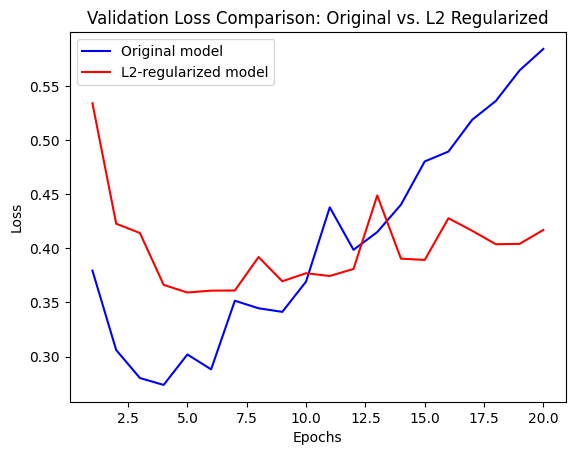

In [34]:
import matplotlib.pyplot as plt

# 기본 모델과 L2 규제를 적용한 모델의 검증 손실 가져오기
original_val_loss = history_original.history['val_loss']
l2_model_val_loss = history_l2_reg.history['val_loss']

# Epochs 설정
epochs = range(1, len(original_val_loss) + 1)

# 그래프 그리기
plt.plot(epochs, original_val_loss, 'b', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'r', label='L2-regularized model')
plt.title('Validation Loss Comparison: Original vs. L2 Regularized')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
# from tensorflow.keras import regularizers

# regularizers.l1(0.001)
# regularizers.l1_l2(l1=0.001, l2=0.001)

In [36]:
model = keras.Sequential([
 keras.layers.Dense(16, activation="relu"),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(16, activation="relu"),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
history_dropout = model.fit(
 train_data, train_labels,
 epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.5642 - loss: 0.6721 - val_accuracy: 0.7332 - val_loss: 0.5466
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7283 - loss: 0.5614 - val_accuracy: 0.8694 - val_loss: 0.4602
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8078 - loss: 0.4798 - val_accuracy: 0.8830 - val_loss: 0.3997
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8425 - loss: 0.4140 - val_accuracy: 0.8840 - val_loss: 0.3481
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8876 - loss: 0.3477 - val_accuracy: 0.8896 - val_loss: 0.3136
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8997 - loss: 0.3034 - val_accuracy: 0.8859 - val_loss: 0.2964
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9216 - loss: 0.2715 - val_accuracy: 0.8906 - val_loss: 0.2971
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9250 - loss: 0.2451 - val_accuracy: 0.8900 - v

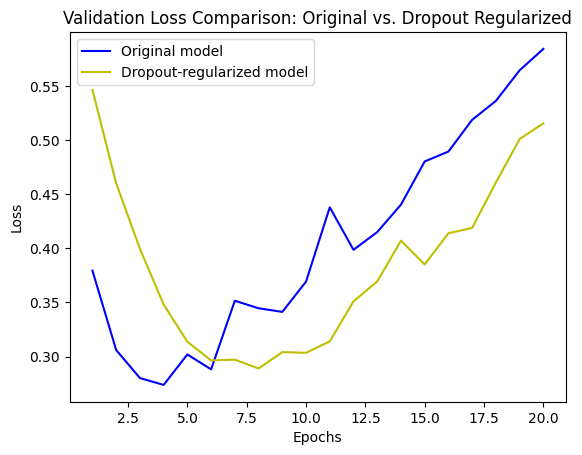

In [37]:
import matplotlib.pyplot as plt

# 기본 모델과 드롭아웃을 적용한 모델의 검증 손실 가져오기
original_val_loss = history_original.history['val_loss']
dropout_model_val_loss = history_dropout.history['val_loss']

# Epochs 설정
epochs = range(1, len(original_val_loss) + 1)

# 그래프 그리기
plt.plot(epochs, original_val_loss, 'b', label='Original model')
plt.plot(epochs, dropout_model_val_loss, 'y', label='Dropout-regularized model')  # 드롭아웃 모델은 노란색으로 표시
plt.title('Validation Loss Comparison: Original vs. Dropout Regularized')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()